In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

In [5]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression():

    def __init__(self, lr=0.0001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred


    def predict_proba(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        # Return predicted probabilities for class 0 and class 1
        return np.column_stack((1 - y_pred, y_pred))

In [3]:
data = pd.read_csv("/Users/rujutajoshi/Sources/GitHub/Task 2/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.shape

(768, 9)

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

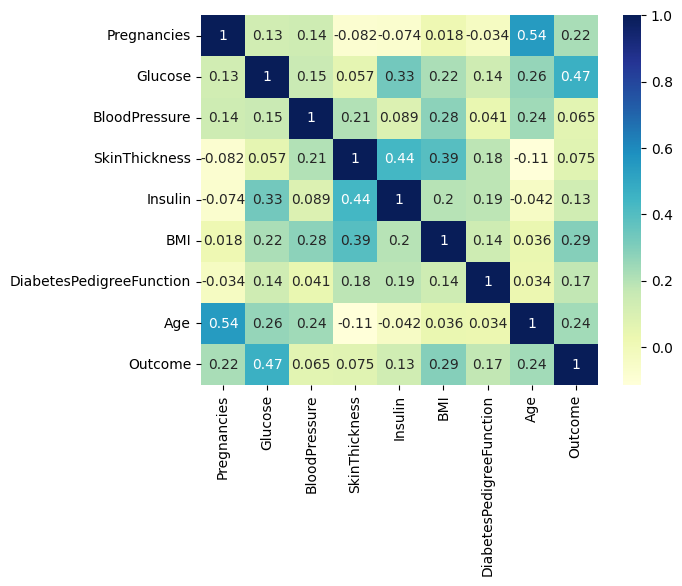

In [13]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)

([<matplotlib.axis.XTick at 0x15b387350>,
 [Text(0, 0, 'Non-Diabetic'), Text(1, 0, 'Diabetic')])

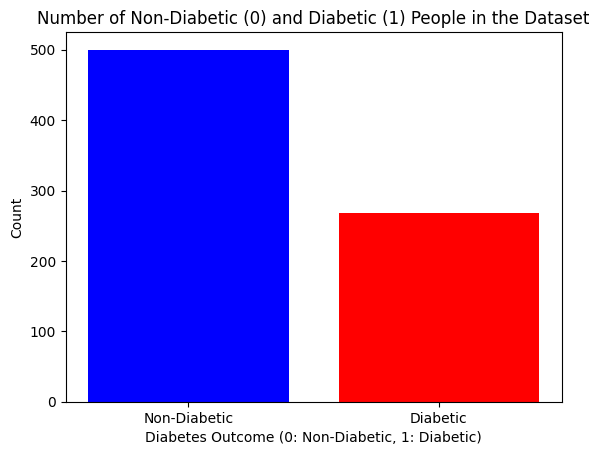

In [7]:
outcome_counts = data['Outcome'].value_counts()

plt.bar(outcome_counts.index, outcome_counts.values, color=['blue', 'red'])
plt.xlabel('Diabetes Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Count')
plt.title('Number of Non-Diabetic (0) and Diabetic (1) People in the Dataset')
plt.xticks(outcome_counts.index, ['Non-Diabetic', 'Diabetic'])


Text(0.5, 1.0, 'Histogram of Glucose for Outcome = 1')

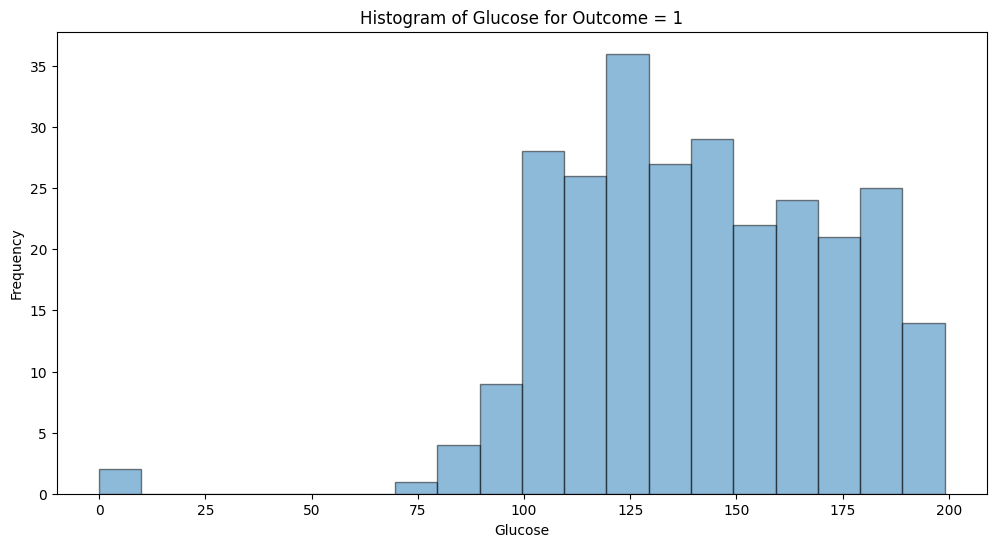

In [23]:
filtered_data = data[data['Outcome'] == 1]

plt.figure(figsize=(12, 6))

plt.hist(filtered_data['Glucose'], bins=20, edgecolor='k', alpha=0.5)
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Histogram of Glucose for Outcome = 1')

Text(0.5, 1.0, 'Histogram of Glucose for Outcome = 1')

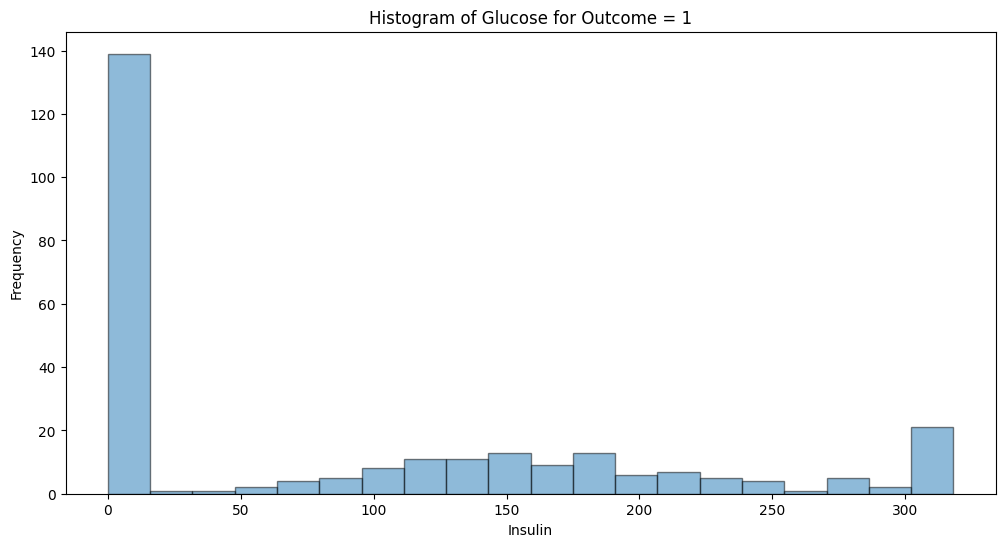

In [579]:
# Filter the data for rows where 'Outcome' is equal to 1
filtered_data = data[data['Outcome'] == 1]

plt.figure(figsize=(12, 6))

plt.hist(filtered_data['Insulin'], bins=20, edgecolor='k', alpha=0.5)
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.title('Histogram of Glucose for Outcome = 1')

<Axes: xlabel='Insulin', ylabel='Glucose'>

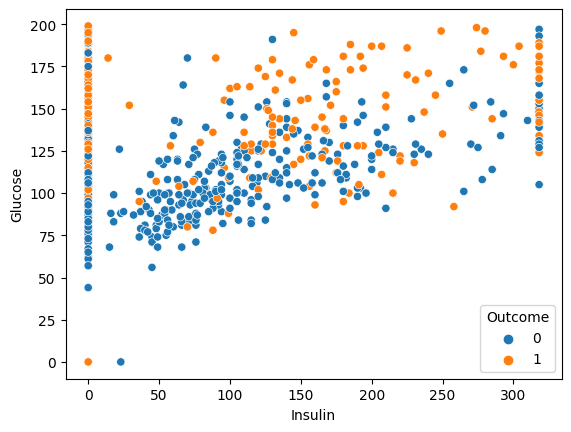

In [580]:
sns.scatterplot(x='Insulin', y='Glucose',
                hue='Outcome', data=data, )

<Axes: xlabel='Age', ylabel='Glucose'>

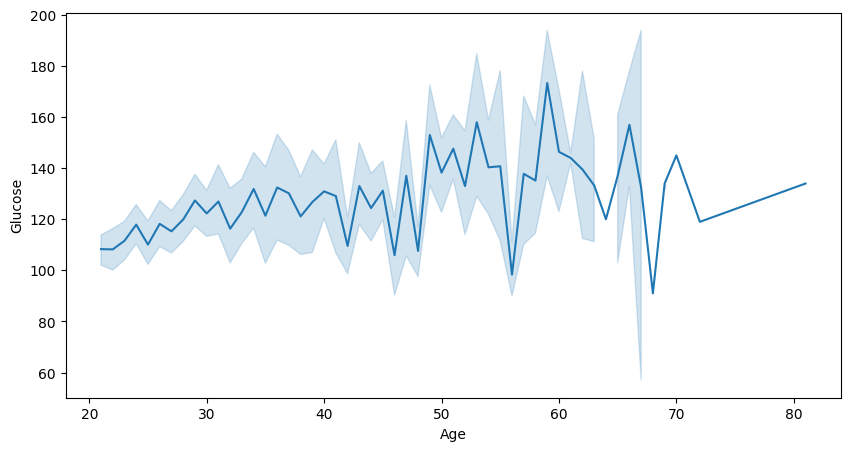

In [581]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Age', y='Glucose', data=data)

In [578]:
#data.drop(["Pregnancies","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"],axis=1,inplace=True)

In [82]:
data

Text(0, 0.5, 'Glucose')

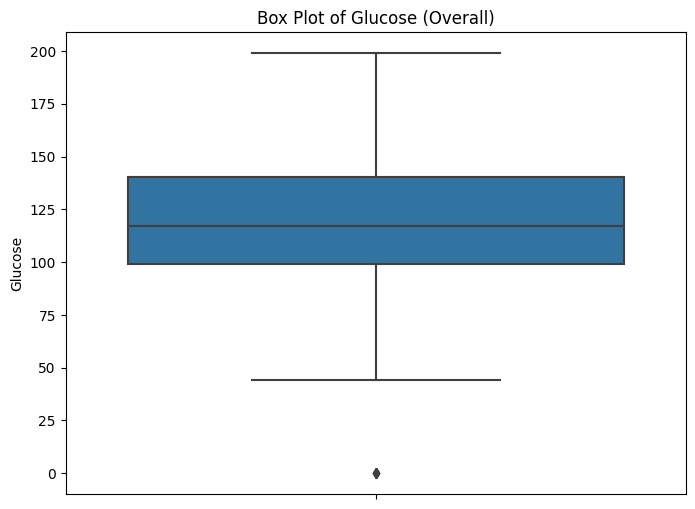

In [494]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='Glucose', data=data)
plt.title('Box Plot of Glucose (Overall)')
plt.ylabel('Glucose')

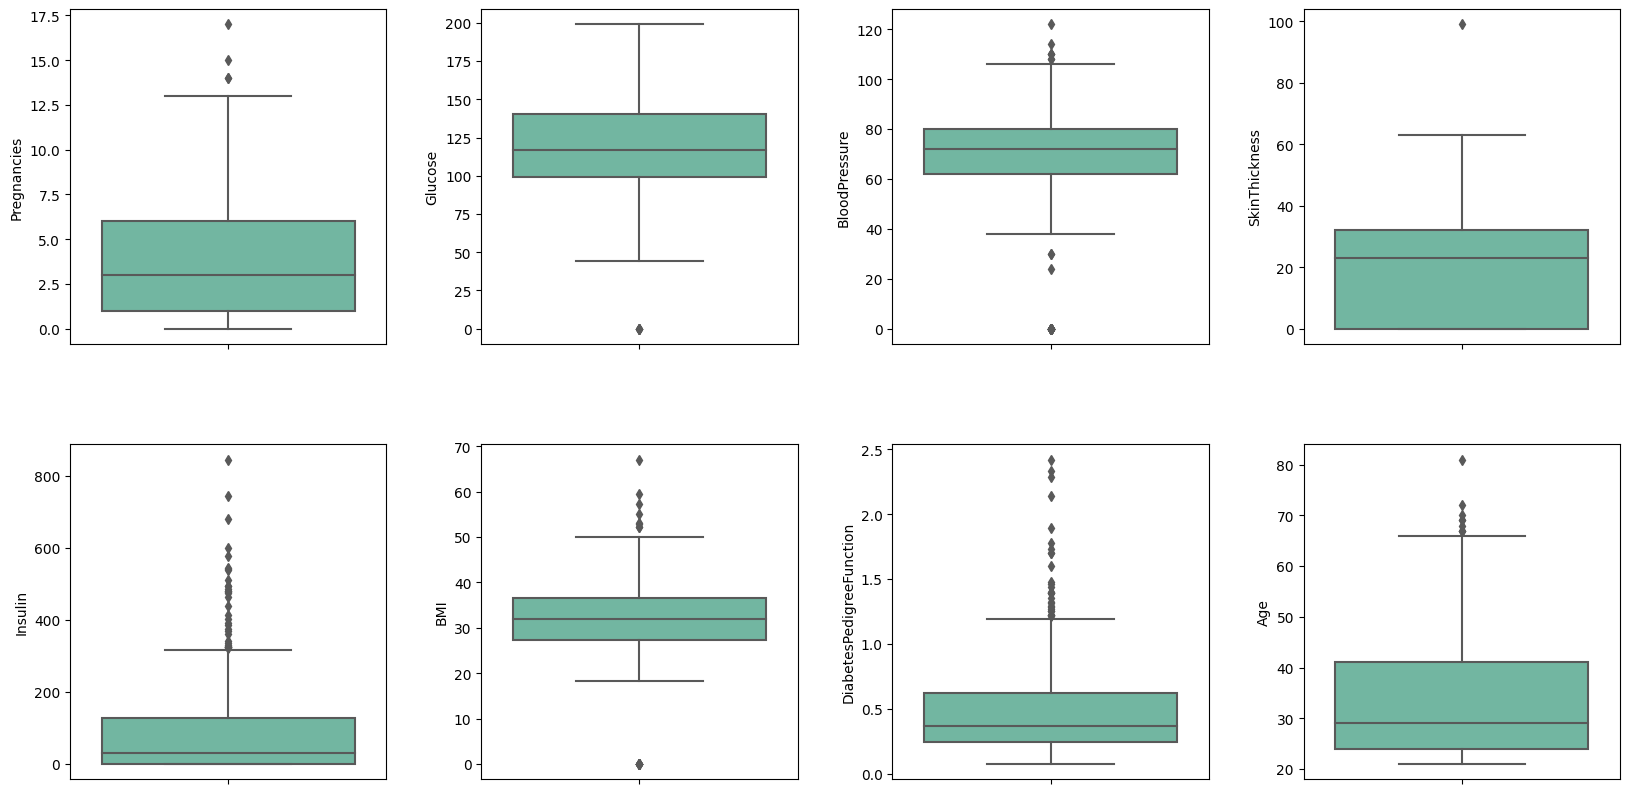

In [419]:
import warnings
warnings.filterwarnings("ignore")

features = data.columns[:-1]  

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

for i, feature in enumerate(features):
    sns.boxplot(y=data[feature],ax=axes[i//4, i%4], palette='Set2')
    
plt.show()

In [421]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [560]:
iqr = 127.250000 - 0.000000
upper_limit = 127.250000 + 1.5 * iqr
lower_limit = 0.000000 - 1.5 * iqr
upper_limit


318.125

In [561]:
data['Insulin'] = np.where(data['Insulin'] > upper_limit,upper_limit,data['Insulin'])
data['Insulin'] = np.where(data['Insulin'] < lower_limit,lower_limit,data['Insulin'])

Text(0, 0.5, 'Insulin')

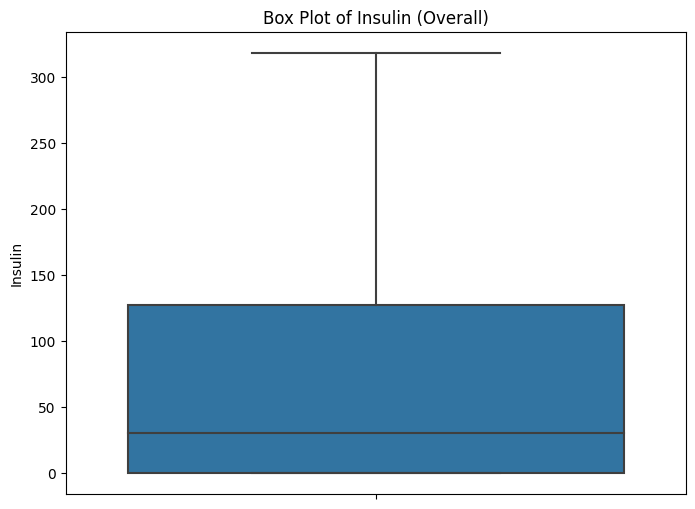

In [562]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='Insulin', data=data)
plt.title('Box Plot of Insulin (Overall)')
plt.ylabel('Insulin')

In [563]:
iqr = 0.626250 - 0.243750
upper_limit = 0.626250 + 1.5 * iqr
lower_limit = 0.243750 - 1.5 * iqr
upper_limit

1.2

In [564]:
data['DiabetesPedigreeFunction'] = np.where(data['DiabetesPedigreeFunction'] > upper_limit,upper_limit,data['DiabetesPedigreeFunction'])
data['DiabetesPedigreeFunction'] = np.where(data['DiabetesPedigreeFunction'] < lower_limit,lower_limit,data['DiabetesPedigreeFunction'])

Text(0, 0.5, 'DiabetesPedigreeFunction')

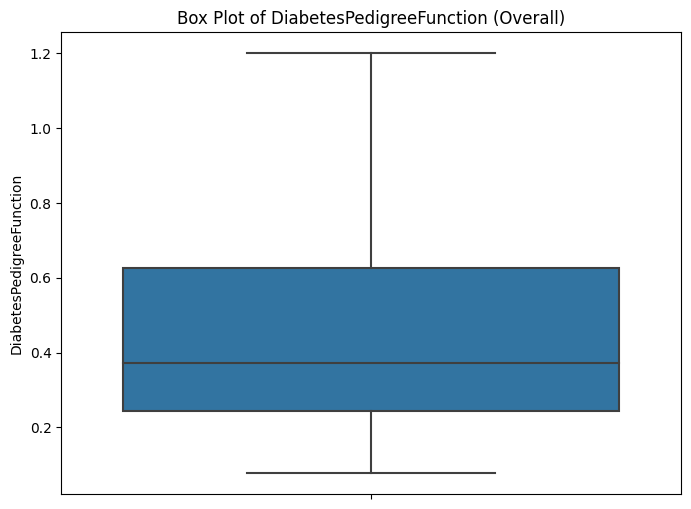

In [565]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='DiabetesPedigreeFunction', data=data)
plt.title('Box Plot of DiabetesPedigreeFunction (Overall)')
plt.ylabel('DiabetesPedigreeFunction')

In [566]:
iqr = 36.600000 - 27.300000
upper_limit = 36.600000 + 1.5 * iqr
lower_limit = 27.300000 - 1.5 * iqr
upper_limit

50.550000000000004

In [567]:
data['BMI'] = np.where(data['BMI'] > upper_limit,upper_limit,data['BMI'])
data['BMI'] = np.where(data['BMI'] < lower_limit,lower_limit,data['BMI'])

Text(0, 0.5, 'BMI')

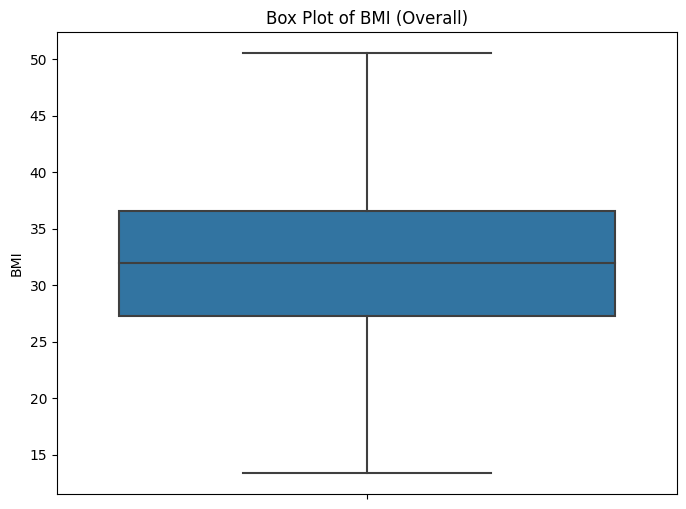

In [568]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='BMI', data=data)
plt.title('Box Plot of BMI (Overall)')
plt.ylabel('BMI')

In [10]:
x = data.drop(["Outcome"],axis=1)
y = data["Outcome"]

In [577]:
data.shape

(768, 9)

In [11]:
X_train , X_test , y_train , y_test = train_test_split(x,y,train_size=0.60,random_state = 42)

In [377]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 426 to 102
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               460 non-null    int64  
 1   Glucose                   460 non-null    int64  
 2   BloodPressure             460 non-null    int64  
 3   SkinThickness             460 non-null    int64  
 4   Insulin                   460 non-null    int64  
 5   BMI                       460 non-null    float64
 6   DiabetesPedigreeFunction  460 non-null    float64
 7   Age                       460 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 32.3 KB


In [11]:
standardscaler = StandardScaler()
x_train = standardscaler.fit_transform(X_train)
x_test = standardscaler.transform(X_test)

In [293]:
X_test

,Glucose
668,98
324,112
624,108
690,107
473,136
...,...
367,101
446,100
589,73
342,0


In [13]:
regression = LogisticRegression()
regression.fit(X_train,y_train)
prediction = regression.predict(X_test)


In [387]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
367,0,101,64,17,0,21.0,0.252,21
446,1,100,72,12,70,25.3,0.658,28
589,0,73,0,0,0,21.1,0.342,25
342,1,0,68,35,0,32.0,0.389,22


In [398]:
y_test


668    0
324    0
624    0
690    0
473    0
      ..
367    0
446    0
589    0
342    0
453    0
Name: Outcome, Length: 308, dtype: int64

In [582]:
result = pd.DataFrame({"prediction": prediction, "actual_price": y_test})
print(result)

     prediction  actual_price
668           0             0
324           0             0
624           0             0
690           0             0
473           0             0
..          ...           ...
367           0             0
446           0             0
589           1             0
342           0             0
453           1             0

[308 rows x 2 columns]


In [583]:
print(result[100:106])


     prediction  actual_price
548           0             0
290           0             0
72            0             1
244           0             0
394           0             1
620           0             0


In [14]:

user_input = []

pregnancies = float(input("Enter the number of Pregnancies: "))
glucose = float(input("Enter the Glucose level: "))
blood_pressure = float(input("Enter the Blood Pressure: "))
skin_thickness = float(input("Enter the Skin Thickness: "))
insulin = float(input("Enter the Insulin level: "))
bmi = float(input("Enter the BMI: "))
diabetes_pedigree_function = float(input("Enter the Diabetes Pedigree Function: "))
age = float(input("Enter the Age: "))

user_input.extend([pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age])


user_input = np.array(user_input).reshape(1, -1)
user_input_scaled = standardscaler.transform(user_input)


prediction = regression.predict(user_input_scaled)

# Interpret the prediction 1	85	66	29	0	26.6	0.351	31
if prediction[0] == 1:
    print("The model predicts that you have diabetes.")
else:
    print("The model predicts that you do not have diabetes.")

Enter the number of Pregnancies:  1
Enter the Glucose level:  85
Enter the Blood Pressure:  66
Enter the Skin Thickness:  29
Enter the Insulin level:  0
Enter the BMI:  26.6
Enter the Diabetes Pedigree Function:  0.351
Enter the Age:  31


The model predicts that you do not have diabetes.


In [584]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

acc = accuracy(prediction, y_test)
print(acc)

0.6948051948051948


In [418]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       206
           1       0.57      0.38      0.46       102

    accuracy                           0.70       308
   macro avg       0.65      0.62      0.62       308
weighted avg       0.68      0.70      0.68       308



In [393]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[176  30]
 [ 63  39]]


In [574]:

y_scores = regression.predict_proba(X_test)
print(y_scores)


[[0.53168931 0.46831069]
 [0.72975045 0.27024955]
 [0.63320637 0.36679363]
 [0.69659031 0.30340969]
 [0.65236196 0.34763804]
 [0.59445312 0.40554688]
 [0.61753847 0.38246153]
 [0.123114   0.876886  ]
 [0.51108501 0.48891499]
 [0.48471328 0.51528672]
 [0.60994094 0.39005906]
 [0.56668667 0.43331333]
 [0.4196234  0.5803766 ]
 [0.67466653 0.32533347]
 [0.66075022 0.33924978]
 [0.4599225  0.5400775 ]
 [0.75635962 0.24364038]
 [0.71581328 0.28418672]
 [0.06072672 0.93927328]
 [0.54992182 0.45007818]
 [0.63231328 0.36768672]
 [0.77512557 0.22487443]
 [0.63988818 0.36011182]
 [0.68047953 0.31952047]
 [0.59009157 0.40990843]
 [0.52129013 0.47870987]
 [0.58965602 0.41034398]
 [0.71432111 0.28567889]
 [0.8017922  0.1982078 ]
 [0.70851692 0.29148308]
 [0.60564804 0.39435196]
 [0.48615893 0.51384107]
 [0.47279833 0.52720167]
 [0.08308538 0.91691462]
 [0.74352295 0.25647705]
 [0.55710281 0.44289719]
 [0.38503538 0.61496462]
 [0.78158765 0.21841235]
 [0.56091023 0.43908977]
 [0.12967781 0.87032219]


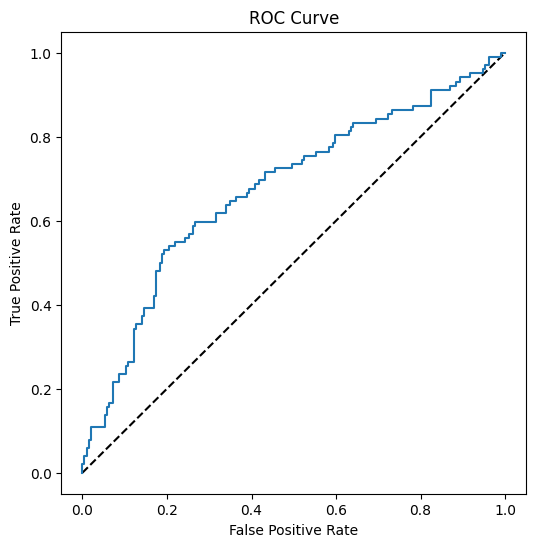

In [575]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

fpr,tpr,thresholds=roc_curve(y_test,y_scores[:,1])
fig=plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [576]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.6753759756329716
